In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

### Data Processing


The np.random.seed(42) ensures that the random numbers are replicable. Using the fast.ai library, a image data bunch is created from the train and validation folders.
All images are cropped to 244x244 since that is what the architecture resnet34 is trained on. The transformations adjust the photos by cropping, centering and zooming in the images.
Normalization ensures that the three color channels (red green and blue) have pixel values that are normalized (mean of 0 and standard deviation of 1)

In [2]:
np.random.seed(42)

path_data = 'images'
data = ImageDataBunch.from_folder(path_data, train="train", valid="validation",
        ds_tfms=get_transforms(), size=150, num_workers=4).normalize(imagenet_stats)

In [3]:
data.valid_ds

LabelList (7066 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: CategoryList
disgust,disgust,disgust,disgust,disgust
Path: images

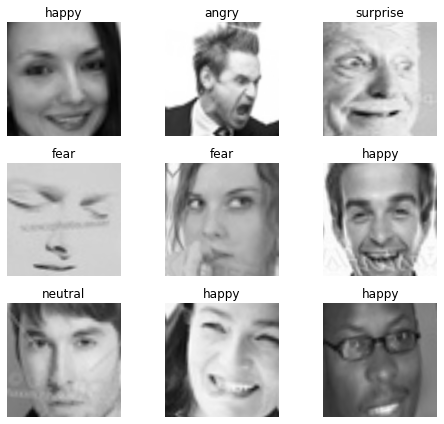

In [4]:
data.show_batch(rows=3, figsize=(7,6))

### Training


We will use a learner to train the model. The learner takes in the image data bunch as well as the resnet34 architecture to train the model. The metrics will be used to print the error_rate when training

In [5]:
print(data.classes)
len(data.classes),data.c

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


(7, 7)

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
